## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# scikit-learn 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)

from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.naive_bayes import *  # 나이브베이즈 분류 알고리즘 제공
from sklearn.neural_network import *  # 인공신경망 분류 알고리즘 제공
from sklearn.tree import *  # 결정트리 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공

from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.pipeline import *  # feature 처리 등의 변환과 ML 알고리즘 학습/예측 등을 함께 묶어서 실행하는 유틸리티 제공

#
####################################################################################

# Data 확인 및 전처리

## Dataset 불러오기 및 data 정보 확인

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df = pd.read_csv(r'C:\Users\Boanerges\GitHub\rawdata\breast-cancer-wisconsin.csv')
df

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [3]:
df = df[ ['Class', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses'] ]
df

,Class,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1
679,0,2,1,1,1,2,1,1,1,1
680,1,5,10,10,3,7,3,8,10,2
681,1,4,8,6,4,3,4,10,6,1


In [4]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Class                        683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


# 변수 지정 및 훈련/테스트 데이터 분리

## x값(예측변수), y값(목표변수) 설정

In [5]:
# 목표변수와 나머지 변수들을 따로 저장
x = df.iloc[: , 1:10 ]
y = df.iloc[:, 0 ]

## 학습/테스트용 데이터셋 분리

In [6]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      stratify = y,
                                                      test_size = 0.3,
                                                      random_state = 0 )

In [7]:
# 라벨별 데이터 분포 확인
print( 'Train_data class', Counter(y_train) )
print()
print( 'Test_data class', Counter(y_test) )
print()

Train_data class Counter({0: 311, 1: 167})

Test_data class Counter({0: 133, 1: 72})



# 모델 생성 및 분류 수행

- Logistic `Regression: LogisticRegression()`

- KNN: `KNeighborsClassifier()`

## 모델 생성 및 적합

In [15]:
# 모델 생성
model = KNeighborsClassifier( n_neighbors = 5 )

# 모델 적합
model.fit( x_train, y_train )

# 모델이 예측한 Class 확인
model.classes_

array([0, 1], dtype=int64)

# 예측 및 모델 성능평가

## 학습된 모델로 예측 수행

In [16]:
# test 데이터로 라벨 예측
pred_test = model.predict( x_test )

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : pred_test,
               'Pred_Result' : y_test == pred_test} ).head()

,y_True,y_Predict,Pred_Result
112,0,0,True
220,1,1,True
398,0,0,True
401,1,1,True
467,1,1,True


In [17]:
# 정확도 확인
print( 'Accuracy(train):', model.score( x_train, y_train ) )
print( 'Accuracy(test):', model.score( x_test, y_test ) )
print()

Accuracy(train): 0.9769874476987448
Accuracy(test): 0.9609756097560975



## Confusion Metrix

In [18]:
pd.crosstab( y_test, pred_test,
                rownames=['pred'], colnames=['real'] )

real,0,1
pred,,
0,130,3
1,5,67


## 분석 지표

In [20]:
print( 'Accuracy: ', accuracy_score( y_test, pred_test ) )
print()
print( classification_report( y_test, pred_test, digits = 4 ) )
print()

Accuracy:  0.9609756097560975

              precision    recall  f1-score   support

           0     0.9630    0.9774    0.9701       133
           1     0.9571    0.9306    0.9437        72

    accuracy                         0.9610       205
   macro avg     0.9601    0.9540    0.9569       205
weighted avg     0.9609    0.9610    0.9608       205




## ROC curve / AUC (Binary Class)

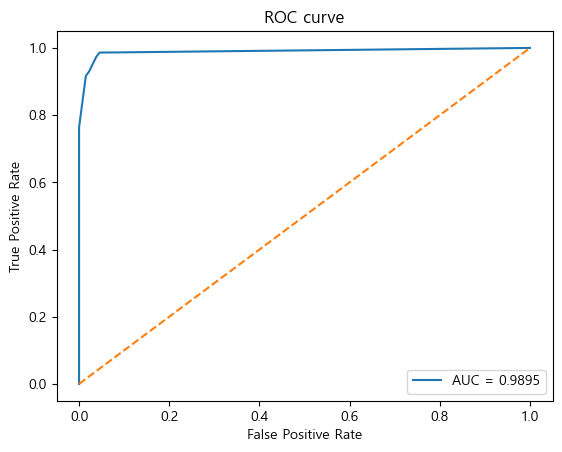

In [22]:
# 각 클래스(0, 1)가 예측될 확률
y_proba = model.predict_proba( x_test )

# AUC 산출 (Positive Label = 1)
auc = roc_auc_score( y_test, y_proba[:,1] )

# FPR, TPR 산출 (Positive Label = 1)
fpr, tpr, thresholds = roc_curve( y_test,
                                  y_proba[:,1],
                                  pos_label = 1)

# ROC curve 출력
RocCurveDisplay( fpr=fpr, tpr=tpr ).plot()

plt.plot( [0,1], [0,1], '--' )
plt.title( 'ROC curve' )
plt.legend( labels = ['AUC = %.4f' % auc], loc = 'lower right' )
plt.show()

# Hyper parameter 최적화

## Grid Search CV

### 탐색할 파라미터 범위 지정

In [23]:
# 파라미터 목록 확인
list( model.get_params().keys() )

['algorithm',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'weights']

In [25]:
# 평가할 파라미터 split 조건 설정
params = { 'n_neighbors' : range(2,30) }

### Grid Search 모델 생성 및 적합

In [27]:
# Grid Search 모델 생성
# scoring 옵션: 정확도는 'accuracy', AUC는 'roc_auc', 다중 클래스의 AUC는 'roc_auc_ovr'

grid_search = GridSearchCV( model,
                            param_grid = params,
                            scoring = 'roc_auc_ovr',
                            cv = 30,
                            return_train_score = True,
                            n_jobs = -1 )

# Grid Search 모델 적합
grid_search.fit( x_train, y_train )

GridSearchCV(cv=30, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 30)}, return_train_score=True,
             scoring='roc_auc_ovr')

In [39]:
# Grid Search 결과 데이터프레임 생성 
result_grid = pd.DataFrame( grid_search.cv_results_ )

result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split22_train_score,split23_train_score,split24_train_score,split25_train_score,split26_train_score,split27_train_score,split28_train_score,split29_train_score,mean_train_score,std_train_score
0,0.006196,0.002494,0.006629,0.001869,2,{'n_neighbors': 2},1.0,0.854545,1.0,1.0,...,0.999422,0.999340,0.999422,0.999494,0.999257,0.999711,0.999344,0.999344,0.999363,0.000106
1,0.004930,0.000813,0.005430,0.001054,3,{'n_neighbors': 3},1.0,0.854545,1.0,1.0,...,0.998370,0.998349,0.998421,0.998762,0.998421,0.998948,0.998646,0.998431,0.998468,0.000182
2,0.004930,0.002095,0.005630,0.001401,4,{'n_neighbors': 4},1.0,0.854545,1.0,1.0,...,0.997637,0.997225,0.997152,0.997792,0.997152,0.997978,0.997744,0.997385,0.997517,0.000268
3,0.004830,0.000819,0.005264,0.000573,5,{'n_neighbors': 5},1.0,0.854545,1.0,1.0,...,0.997483,0.997431,0.997400,0.997844,0.997493,0.998133,0.997693,0.997580,0.997642,0.000238
4,0.004930,0.001947,0.005164,0.000453,6,{'n_neighbors': 6},1.0,0.854545,1.0,1.0,...,0.997018,0.997070,0.997080,0.997286,0.997090,0.997813,0.997354,0.997190,0.997280,0.000260
5,0.004431,0.000495,0.005497,0.000562,7,{'n_neighbors': 7},1.0,0.854545,1.0,1.0,...,0.996863,0.997059,0.997059,0.997173,0.997090,0.997864,0.997293,0.997190,0.997206,0.000274
6,0.005097,0.002807,0.005330,0.000471,8,{'n_neighbors': 8},1.0,0.890909,1.0,1.0,...,0.996812,0.996492,0.996585,0.996667,0.996595,0.998133,0.996903,0.996637,0.996843,0.000412
7,0.004697,0.000586,0.006263,0.002487,9,{'n_neighbors': 9},1.0,0.890909,1.0,1.0,...,0.996987,0.996894,0.996998,0.997142,0.996843,0.997978,0.997149,0.997047,0.997065,0.000258
8,0.005730,0.003181,0.005630,0.000836,10,{'n_neighbors': 10},1.0,0.890909,1.0,1.0,...,0.996771,0.996698,0.996688,0.996853,0.996513,0.997668,0.996924,0.996791,0.996820,0.000226
9,0.004564,0.000919,0.005996,0.001460,11,{'n_neighbors': 11},1.0,0.890909,1.0,1.0,...,0.996440,0.996451,0.996564,0.996657,0.996409,0.997699,0.996811,0.996688,0.996654,0.000245


In [40]:
# Test Score 기준으로 정렬하여 결과 출력
result_grid[ ['params',
              'mean_train_score', 'mean_test_score',
              'rank_test_score'] ].sort_values(['rank_test_score']).round(4)

,params,mean_train_score,mean_test_score,rank_test_score
17,{'n_neighbors': 19},0.9966,0.9942,1
16,{'n_neighbors': 18},0.9967,0.9942,1
15,{'n_neighbors': 17},0.9966,0.9942,1
14,{'n_neighbors': 16},0.9963,0.9942,1
19,{'n_neighbors': 21},0.9963,0.9936,5
24,{'n_neighbors': 26},0.9955,0.9936,5
23,{'n_neighbors': 25},0.9957,0.9936,5
22,{'n_neighbors': 24},0.9959,0.9936,5
21,{'n_neighbors': 23},0.9960,0.9936,5
18,{'n_neighbors': 20},0.9965,0.9936,5


#### 최적의 파라미터 출력

In [30]:
# 최적 파라미터 출력
print("최고 Score: ", grid_search.best_score_.round(4) )
print("최적 Parameters: ", grid_search.best_params_ )
print("최적 Estimators: ", grid_search.best_estimator_ )
print()

최고 Score:  0.9942
최적 Parameters:  {'n_neighbors': 16}
최적 Estimators:  KNeighborsClassifier(n_neighbors=16)



#### 파라미터의 값에 따른 score 비교 (Train_data vs. Test_data)

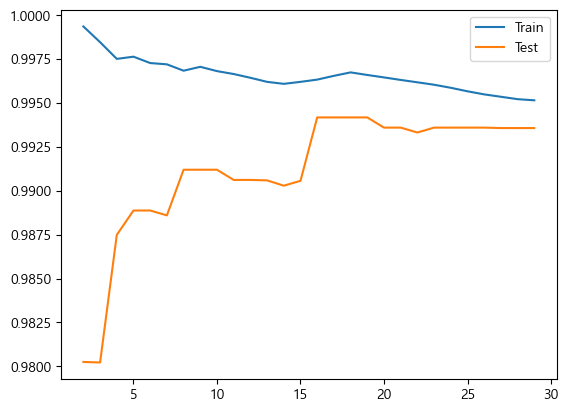

In [32]:
plt.plot( result_grid.param_n_neighbors,
          result_grid[ 'mean_train_score' ],
          label = 'Train')

plt.plot( result_grid.param_n_neighbors,
          result_grid[ 'mean_test_score' ],
          label = 'Test')

plt.legend()
plt.show()

### Grid Search 모델 성능평가

#### 학습된 모델로 예측 수행

In [33]:
# test 데이터로 라벨 예측
pred_test = grid_search.predict( x_test )

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : pred_test,
               'Pred_Result' : y_test == pred_test} ).head()

,y_True,y_Predict,Pred_Result
112,0,0,True
220,1,1,True
398,0,0,True
401,1,1,True
467,1,1,True


#### 분석 지표

In [36]:
print( 'Accuracy: ', accuracy_score( y_test, pred_test ) )
print()
print( classification_report( y_test, pred_test, digits = 4 ) )
print()

Accuracy:  0.9609756097560975

              precision    recall  f1-score   support

           0     0.9630    0.9774    0.9701       133
           1     0.9571    0.9306    0.9437        72

    accuracy                         0.9610       205
   macro avg     0.9601    0.9540    0.9569       205
weighted avg     0.9609    0.9610    0.9608       205




#### ROC curve / AUC (Binary Class)

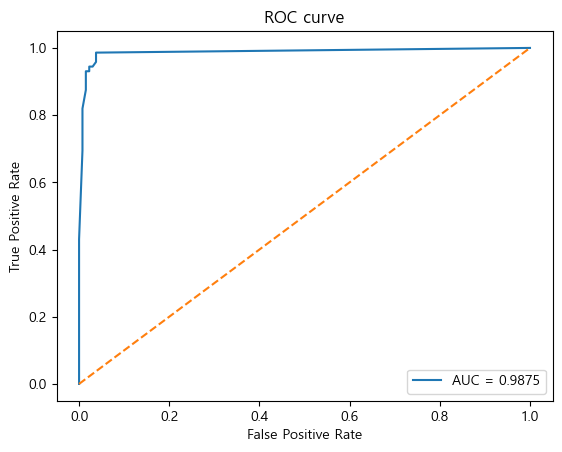

In [38]:
# 각 클래스(0, 1)가 예측될 확률
y_proba = grid_search.predict_proba( x_test )

# AUC 산출 (Positive Label = 1)
auc = roc_auc_score( y_test, y_proba[:,1] )

# FPR, TPR 산출 (Positive Label = 1)
fpr, tpr, thresholds = roc_curve( y_test,
                                  y_proba[:,1],
                                  pos_label = 1)
# ROC curve 출력
RocCurveDisplay( fpr=fpr, tpr=tpr ).plot()

plt.plot( [0,1], [0,1], '--' )
plt.title( 'ROC curve' )
plt.legend( labels = ['AUC = %.4f' % auc], loc = 'lower right' )
plt.show()